In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os


In [2]:
columns = ['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
           'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
           'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
           'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
           'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
           'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
           'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
           'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
           'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
           'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
           'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
           'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
           'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
           'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
           'Packet _Length_Std', ' Packet_Length_Variance', 'FIN_Flag_Count',
           'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count',
           'ACK_Flag_Count', 'URG_Flag_Count', 'CWE_Flag_Count',
           'ECE_Flag_Count', 'Down/Up_Ratio', 'Average_Packet_Size',
           'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
           'Fwd_Header_Length.1', 'Fwd_Avg_Bytes/Bulk', '_Fwd_Avg_Packets/Bulk',
           'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes/Bulk', 'Bwd_Avg_Packets/Bulk',
           'Bwd_Avg_Bulk_Rate', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes',
           'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
           'Init_Win_bytes_backward', 'act_data_pkt_fwd',
           'min_seg_size_forward', 'Active_Mean', 'Active_Std', 'Active_Max',
           'Active Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min',
           'Label']

csvfile = "/root/data/fxg/csv"
all_scv_list = os.listdir(csvfile)
for single_csv in all_scv_list:
    single_data = pd.read_csv(os.path.join(csvfile, single_csv), header=1)
    if single_csv == all_scv_list[0]:
        data = single_data
    else:
        data = pd.concat([data, single_data], ignore_index=True)
data.columns = columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.Label[data['Label'] != 'BENIGN'] = 1
data.Label[data['Label'] == 'BENIGN'] = 0

/tmp/ipykernel_15305/1641415974.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label[data['Label'] != 'BENIGN'] = 1
/tmp/ipykernel_15305/1641415974.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Label[data['Label'] == 'BENIGN'] = 0


In [3]:
# #硬编码
# encode=LabelEncoder()
# encode.fit(col)
# data['Label']=encode.transform(data['Label'])


In [4]:
X = data.drop(['Label'], axis=1)
labelencoder_x=LabelEncoder()
for i in columns[:-1]:
      X[i]=labelencoder_x.fit_transform(X[i])
y = data['Label'].astype(int)


In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# def xiang_guan(a):
#     # 特征间相关系数热力图
#     f = a.corr()
#     sns.heatmap(f, annot=True)
#     plt.show()
# xiang_guan(data)
# del data

In [5]:

# 标准化
transfer = MinMaxScaler(feature_range=(2, 3))
X = transfer.fit_transform(X)

# 降维
transfer = VarianceThreshold(threshold=0.0)
X = transfer.fit_transform(X)
# 主成分分析
transfer = PCA(n_components=0.9)
X = transfer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


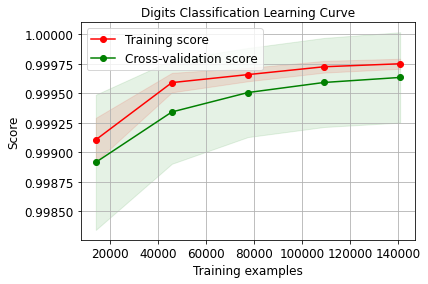

In [6]:
#学习曲线图
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.estimators.plot_learning_curve(KNeighborsClassifier(), X,y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")
plt.show()

In [7]:
feature_name=data.drop(['Label'],axis=1).columns
feature_names=[i for i in list(feature_name)]
feature_name

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet _Length_Std', ' Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_

In [10]:
# data[data.isnull().values==True]
# data
# transfer = MinMaxScaler(feature_range=(2, 3))
# data = transfer.fit_transform(data[data.keys()])


In [8]:
from sklearn.model_selection import GridSearchCV
def KNN(train_X, train_Y, test_X, test_Y):
    print('[KNN] train...')
    t1 = time.time()
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train_X, train_Y)
    y_hat=knn.predict(test_X)

    #模型评估
    acc = accuracy_score(test_Y, y_hat)  #
    t2 = time.time()
    # print('准确率:', acc)
    print('总耗时:', t2 - t1, 'sec')
    print('精确度:', accuracy_score(test_Y, y_hat))
    print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    print('KNN分类报告为：\n',classification_report(test_Y,y_hat))
    print("KNN均方差为：\n", mean_squared_error(test_Y, y_hat))
    print('-' * 20)
KNN(X_train,y_train,X_test,y_test)

[KNN] train...
总耗时: 3.90913462638855 sec
精确度: 0.9994924270110042
混淆矩阵：
 [[48587     8]
 [   17   642]]
KNN分类报告为：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48595
           1       0.99      0.97      0.98       659

    accuracy                           1.00     49254
   macro avg       0.99      0.99      0.99     49254
weighted avg       1.00      1.00      1.00     49254

KNN均方差为：
 0.0005075729889958176
--------------------


In [13]:
# from sklearn.neural_network import MLPClassifier
# print("Neural Network")
# mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
# mlpc.fit(X_train, y_train)
# pred_mlpc = mlpc.predict(X_test)
# print("Neural Network classification_report==\n",
#       classification_report(y_test, pred_mlpc))
# print("Neural Network confusion_matrix==\n",
#       confusion_matrix(y_test, pred_mlpc))
# error = mean_squared_error(y_test, pred_mlpc)
# print("神经网络-均方误差为：\n", error)


Random Forest Classifier
精确度: 0.9993706094936452
耗时: 35.08870792388916 秒
混淆矩阵：
 [[48591     4]
 [   27   632]]
随机森林-均方差为：
 0.0006293905063548138
随即森林分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48595
           1       0.99      0.96      0.98       659

    accuracy                           1.00     49254
   macro avg       1.00      0.98      0.99     49254
weighted avg       1.00      1.00      1.00     49254

----------------------------------------
[0.057283   0.04464268 0.07592722 0.23054847 0.02204594 0.11725754
 0.0731413  0.23797001 0.14118383]
------------



<Figure size 1440x720 with 0 Axes>

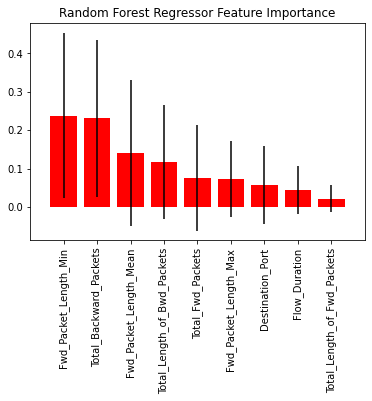

In [9]:
#随机深林
import time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
def RF(train_X, train_Y, test_X, test_Y):
    print("Random Forest Classifier")
    t1 = time.time()
    rfc = RandomForestClassifier()
    rfc.fit(train_X, train_Y)
    Y_pred = rfc.predict(test_X)
    t2 = time.time()
    print('精确度:', accuracy_score(test_Y, Y_pred))
    print('耗时:', t2 - t1, '秒')    
    print('混淆矩阵：\n',confusion_matrix(test_Y, Y_pred))
    print("随机森林-均方差为：\n", mean_squared_error(test_Y, Y_pred))
    print('随即森林分类报告：\n',classification_report(test_Y, Y_pred))
    print('-' * 40)
    fig = plt.figure(figsize=(20,10))
    feature_name=data.drop(['Label'],axis=1).columns
    # ax1 = fig.add_subplot(121)
    skplt.estimators.plot_feature_importances(rfc,feature_names=feature_name,
                                            title="Random Forest Regressor Feature Importance",
                                            x_tick_rotation=90)
    print(rfc.feature_importances_)
    print('------------\n')
    # plt.tight_layout()
    plt.show()
    # plot_confusion_matrix(matrix, label, True, 'RF Confusion matrix')
RF(X_train,y_train,X_test,y_test)

In [10]:
from sklearn.svm import SVC
def SVM(train_X, train_Y, test_X, test_Y):
    print('[SVM] train ...')
    # train_Y = [np.where(r == 1)[0][0] for r in train_Y]
    # test_Y = [np.where(r == 1)[0][0] for r in test_Y]
    t1 = time.time()
    clf = SVC(decision_function_shape='ovr', max_iter=300, kernel='rbf')
    model = clf.fit(train_X, train_Y)
    y_hat = model.predict(test_X)
    t2 = time.time()
    print('精确度:', accuracy_score(test_Y, y_hat))
    print('耗时:', t2 - t1, '秒')    
    print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    print("SVM均方差为：\n", mean_squared_error(test_Y, y_hat))
    print('SVM分类报告：\n',classification_report(test_Y, y_hat))
    fig = plt.figure(figsize=(50,15))
    
    # ax1 = fig.add_subplot(122)
    # skplt.estimators.plot_feature_importances(model,feature_names=feature_name,
    #                                         title="Random Forest Regressor Feature Importance",
    #                                         x_tick_rotation=90, order="ascending")
    # plt.tight_layout()
    # plt.show()
    print('-' * 40)
    # plot_confusion_matrix(matrix, label, True, 'SVM Confusion matrix')
SVM(X_train,y_train,X_test,y_test)

[SVM] train ...


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


精确度: 0.9981930401591749
耗时: 9.609504461288452 秒
混淆矩阵：
 [[48594     1]
 [   88   571]]
SVM均方差为：
 0.0018069598408251106
SVM分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48595
           1       1.00      0.87      0.93       659

    accuracy                           1.00     49254
   macro avg       1.00      0.93      0.96     49254
weighted avg       1.00      1.00      1.00     49254

----------------------------------------


<Figure size 3600x1080 with 0 Axes>

In [ ]:
# from sklearn.svm import SVC
# from sklearn import svm, metrics
# print("SVM Classifier")
# svmc = svm.SVC()
# svmc.fit(X_train, y_train)
# pred_svmc = svmc.predict(X_test)
# print("SVM classification_report==\n",
#       classification_report(y_test, pred_svmc))
# print("SVM classification_confusion_matrix==\n",
#       confusion_matrix(y_test, pred_svmc))
# error = mean_squared_error(y_test, pred_svmc)
# print("SVM-均方误差为：\n", error)


In [11]:
#朴素贝叶斯
from sklearn.naive_bayes import BernoulliNB
def NaiveBayes(train_X, train_Y, test_X, test_Y):
    print('[Naive Bayes] train ...')
    # train_Y = [np.where(r == 1)[0][0] for r in train_Y]
    # test_Y = [np.where(r == 1)[0][0] for r in test_Y]
    t1 = time.time()
    clf = BernoulliNB()
    model = clf.fit(train_X, train_Y)
    y_hat = model.predict(test_X)
    acc = accuracy_score(test_Y, y_hat)
    t2 = time.time()
    print('精确度:', accuracy_score(test_Y, y_hat))
    print('耗时:', t2 - t1, '秒')    
    print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    print("朴素贝叶斯均方差为：\n", mean_squared_error(test_Y, y_hat))
    print('朴素贝叶斯分类报告：\n',classification_report(test_Y, y_hat))
    print('-' * 40)
    # plot_confusion_matrix(matrix, label, True, 'NB Confusion matrix')
NaiveBayes(X_train,y_train,X_test,y_test)

[Naive Bayes] train ...
精确度: 0.9957769927315548
耗时: 0.08224129676818848 秒
混淆矩阵：
 [[48510    85]
 [  123   536]]
朴素贝叶斯均方差为：
 0.004223007268445203
朴素贝叶斯分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48595
           1       0.86      0.81      0.84       659

    accuracy                           1.00     49254
   macro avg       0.93      0.91      0.92     49254
weighted avg       1.00      1.00      1.00     49254

----------------------------------------


In [ ]:
#神经网络
from sklearn.neural_network import MLPClassifier
def MLP(train_X, train_Y, test_X, test_Y):
    print('[MLP] train ...')
    t1 = time.time()
    model = MLPClassifier(hidden_layer_sizes=(100,),
                          activation='logistic',
                          solver='adam',
                          learning_rate_init=0.0001,
                          max_iter=2000)
    model.fit(train_X, train_Y)
    y_hat = model.predict(test_X)
    acc = accuracy_score(test_Y, y_hat)
    t2 = time.time()
    print('acc:', acc)
    print('using time:', t2 - t1, 'sec')
    matrix = confusion_matrix(test_Y, y_hat)
    print(matrix)
    report = classification_report(test_Y, y_hat)
    print(report)
    print('-' * 20)
    # plot_confusion_matrix(matrix, label, True, 'MLP Confusion matrix')
MLP(X_train,y_train,X_test,y_test)

[0.         0.01697834 0.02204477 0.37596853 0.00089331 0.
 0.04566424 0.00148735 0.53696347]
精确度: 0.9989645511024485
耗时: 1.1476404666900635 秒
混淆矩阵：
 [[48580    15]
 [   36   623]]
决策树均方差为：
 0.0010354488975514678
决策树分类报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     48595
           1       0.98      0.95      0.96       659

    accuracy                           1.00     49254
   macro avg       0.99      0.97      0.98     49254
weighted avg       1.00      1.00      1.00     49254



<Figure size 3600x1080 with 0 Axes>

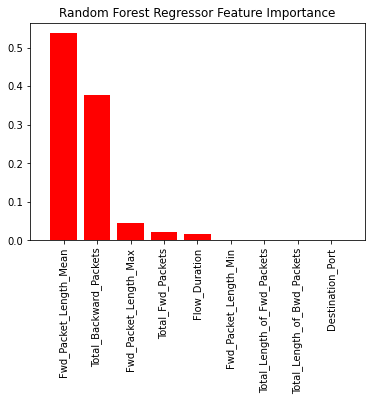

----------------------------------------


In [12]:
#决策树
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def tree3(clf):
    fig = plt.figure(figsize=(35, 10))
    plot_tree(clf, fontsize=8)
    fig.savefig(os.path.join('./', "tree3.png"))

def DT(train_X, train_Y, test_X, test_Y):
    t1 = time.time()
    clf = DecisionTreeClassifier(max_depth=5)
    model = clf.fit(train_X, train_Y)
    print(clf.feature_importances_)
    y_hat = model.predict(test_X)
    t2 = time.time()
    print('精确度:', accuracy_score(test_Y, y_hat))
    print('耗时:', t2 - t1, '秒')    
    print('混淆矩阵：\n',confusion_matrix(test_Y, y_hat))
    print("决策树均方差为：\n", mean_squared_error(test_Y, y_hat))
    print('决策树分类报告：\n',classification_report(test_Y, y_hat))
    fig = plt.figure(figsize=(50,15))
    skplt.estimators.plot_feature_importances(model,feature_names=feature_name,
                                            title="Random Forest Regressor Feature Importance",
                                            x_tick_rotation=90)
    # plt.tight_layout()
    plt.show()
    print('-' * 40)
    # plot_confusion_matrix(matrix, label, True, 'DT Confusion matrix')
DT(X_train,y_train,X_test,y_test)